In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import *

In [2]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose

    def __add_intercept(self, train_data):
        intercept = np.ones((train_data.shape[0], 1))
        return np.concatenate((intercept, train_data), axis=1)

    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def __loss(self, h, class_values):
        """
        likelihood function
        :param h: hypothesis
        :param class_values: actual value
        :return:
        """
        return (-class_values * np.log(h) - (1 - class_values) * np.log(1 - h)).mean()

    def fit(self, attr, class_values):
        if self.fit_intercept:
            attr = self.__add_intercept(attr)

        # weights initialization
        self.theta = np.zeros(attr.shape[1])

        for i in range(self.num_iter):
            z = np.dot(attr, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(attr.T, (h - class_values)) / class_values.size
            self.theta -= self.lr * gradient

            z = np.dot(attr, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, class_values)

            if (self.verbose == True and i % 10000 == 0):
                print(f'loss: {loss} \t')

    def predict_prob(self, attr):
        if self.fit_intercept:
            attr = self.__add_intercept(attr)

        return self.__sigmoid(np.dot(attr, self.theta))

    def predict(self, attr):
        return self.predict_prob(attr).round()

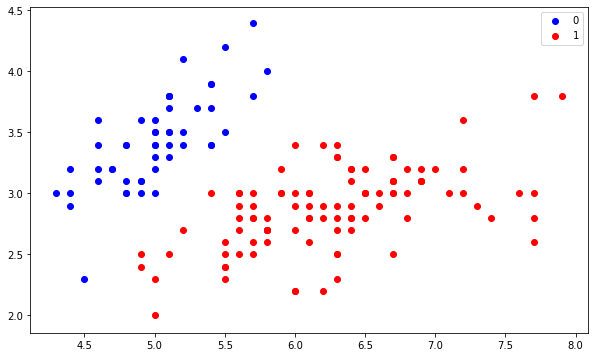

In [3]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1

plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
plt.show()

In [4]:
features_num = X.shape[0]

test_p = 20

test_index = int(features_num - (test_p * features_num) / 100)

data = np.c_[X, y]
np.random.shuffle(data)

train_x = data[:test_index, :2]
train_y = data[:test_index, 2]

test_x = data[test_index:, :2]
test_y = data[test_index:, 2]

In [8]:
model = LogisticRegression(lr=0.1, num_iter=30000)

print('Training...')
model.fit(train_x, train_y)

print('Model params is {0}'.format(model.theta))

Training...
Model params is [ -7.11864292   7.1106236  -10.0849507 ]


In [9]:
print('Predicting...')
preds = model.predict(test_x)
print(preds)

Predicting...
[1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0.
 1. 1. 0. 0. 0. 0.]


In [10]:
accuracy = (preds == test_y).mean()
print('Accuracy is {0}%'.format(accuracy * 100))

Accuracy is 100.0%
